In [102]:
# Imports and housekeeping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set_theme(style="darkgrid")

In [103]:
# Import the main dataset
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64})

In [104]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [105]:
# Display dataset top 5 rows
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [106]:
# Trim dataset to variables relevant to research question
columns = ['Area', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 
           'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
df_data = pd.DataFrame(df[columns])

In [107]:
# Check data for null or missing values
df_data.isna().any()

Area                    False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Yearly_equip_failure    False
Tenure                  False
MonthlyCharge           False
Bandwidth_GB_Year       False
dtype: bool

In [108]:
# Check data for duplicated rows
df_data.duplicated().sum()

0

In [109]:
# Display summary statistics for entire dataset - continuous variables
df_data.describe()

,Children,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,0.398000,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,2.976019,0.635953,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,0.099747,0.000000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,8.018214,0.000000,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,10.018560,0.000000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,11.969485,1.000000,61.479795,200.734725,5586.141370
max,10.0000,89.000000,258900.700000,21.207230,6.000000,71.999280,290.160419,7158.981530


In [110]:
# Display summary statistics for entire dataset - categorical variables
df_data.describe(include = object)

,Area,Marital,Gender,Churn
count,10000,10000,10000,10000
unique,3,5,3,2
top,Suburban,Divorced,Female,No
freq,3346,2092,5025,7350


In [111]:
# Initialize figure size settings
plt.rcParams['figure.figsize'] = [10, 10]

array([[<AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Outage_sec_perweek'}>,
        <AxesSubplot:title={'center':'Yearly_equip_failure'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharge'}>,
        <AxesSubplot:title={'center':'Bandwidth_GB_Year'}>,
        <AxesSubplot:>]], dtype=object)

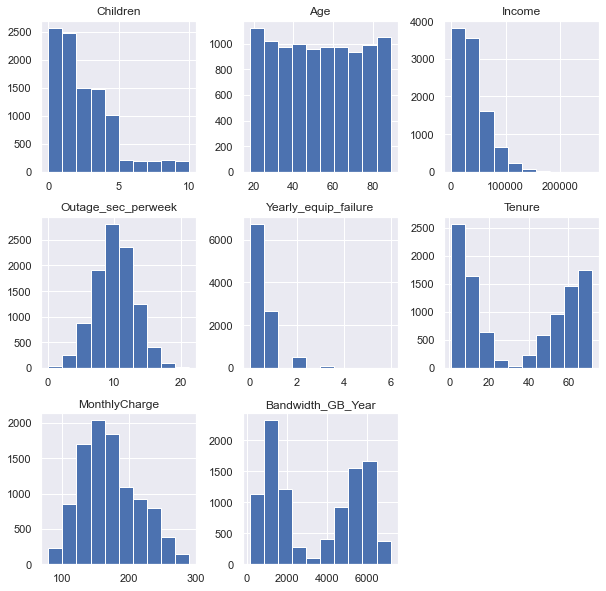

In [112]:
# Display histogram plots for distribution of continuous variables
df_data.hist()

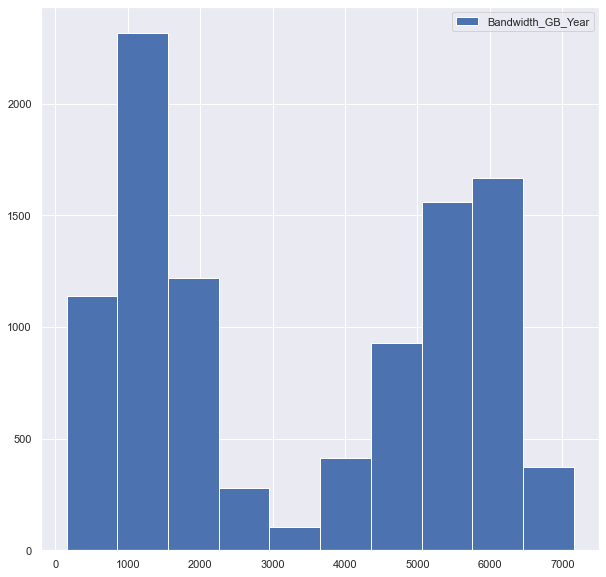

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [113]:
# Display histogram plot and summary statistics for Bandwidth_GB_Year
df_data['Bandwidth_GB_Year'].hist(legend = True)
plt.show()
df_data['Bandwidth_GB_Year'].describe()

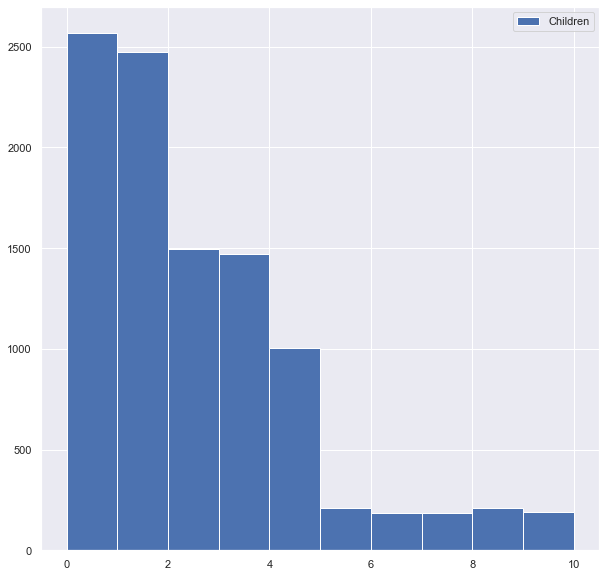

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [114]:
# Display histogram plot and summary statistics for Children
df_data['Children'].hist(legend = True)
plt.show()
df_data['Children'].describe()

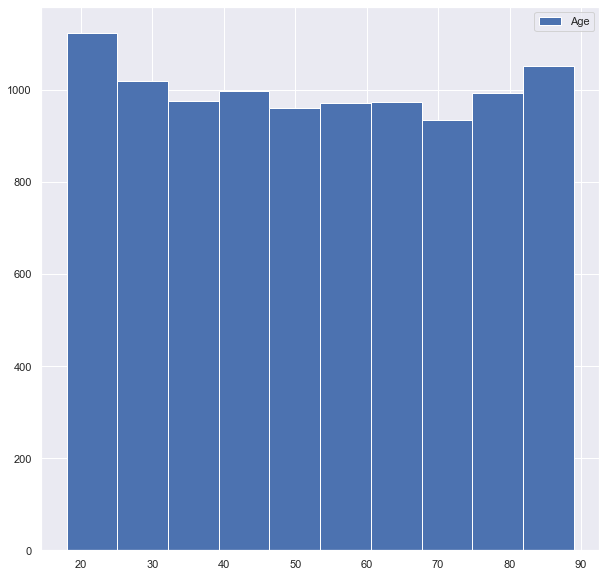

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [115]:
# Display histogram plot and summary statistics for Age
df_data['Age'].hist(legend = True)
plt.show()
df_data['Age'].describe()

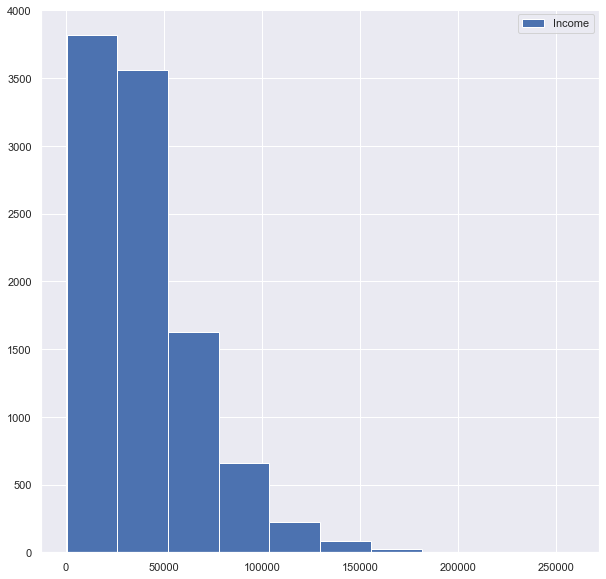

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [116]:
# Display histogram plot and summary statistics for Income
df_data['Income'].hist(legend = True)
plt.show()
df_data['Income'].describe()

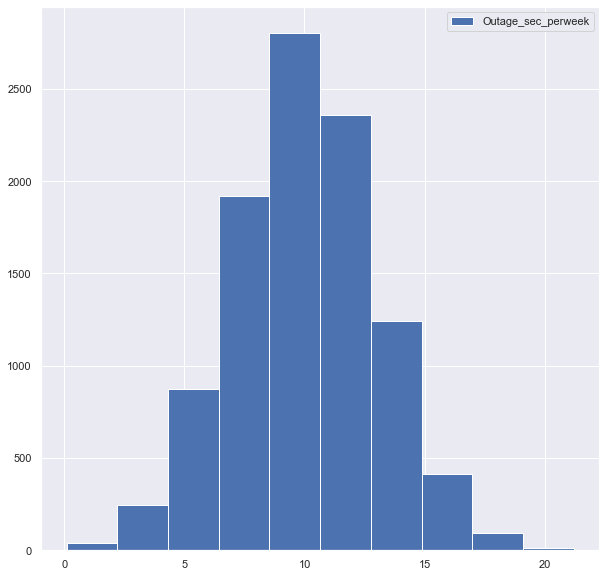

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [117]:
# Display histogram plot and summary statistics for Outage_sec_perweek
df_data['Outage_sec_perweek'].hist(legend = True)
plt.show()
df_data['Outage_sec_perweek'].describe()

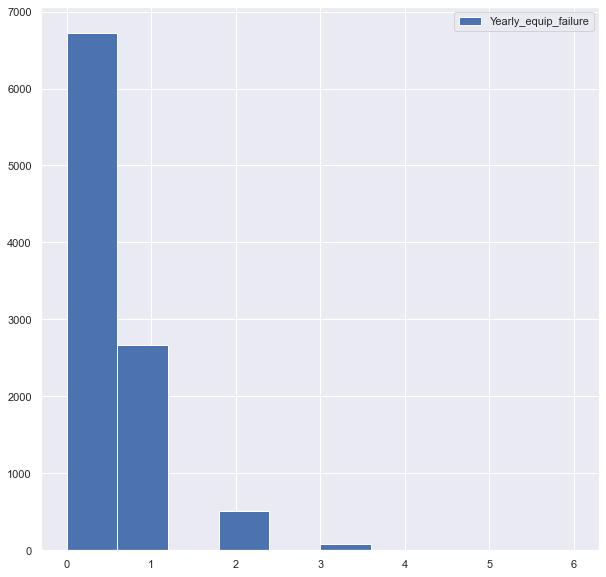

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [118]:
# Display histogram plot and summary statistics for Yearly_equip_failure
df_data['Yearly_equip_failure'].hist(legend = True)
plt.show()
df_data['Yearly_equip_failure'].describe()

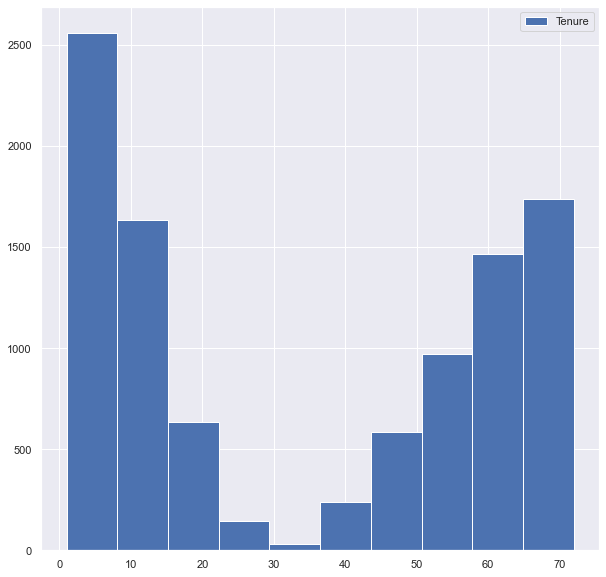

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [119]:
# Display histogram plot and summary statistics for Tenure
df_data['Tenure'].hist(legend = True)
plt.show()
df_data['Tenure'].describe()

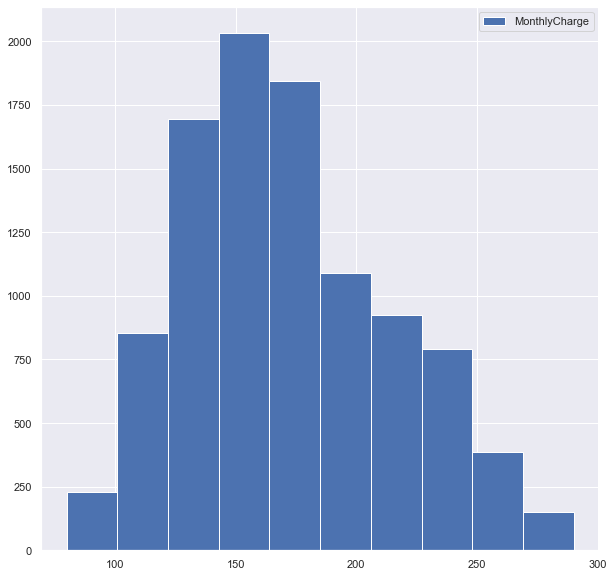

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [120]:
# Display histogram plot and summary statistics for MonthlyCharge
df_data['MonthlyCharge'].hist(legend = True)
plt.show()
df_data['MonthlyCharge'].describe()

<AxesSubplot:xlabel='Churn', ylabel='count'>

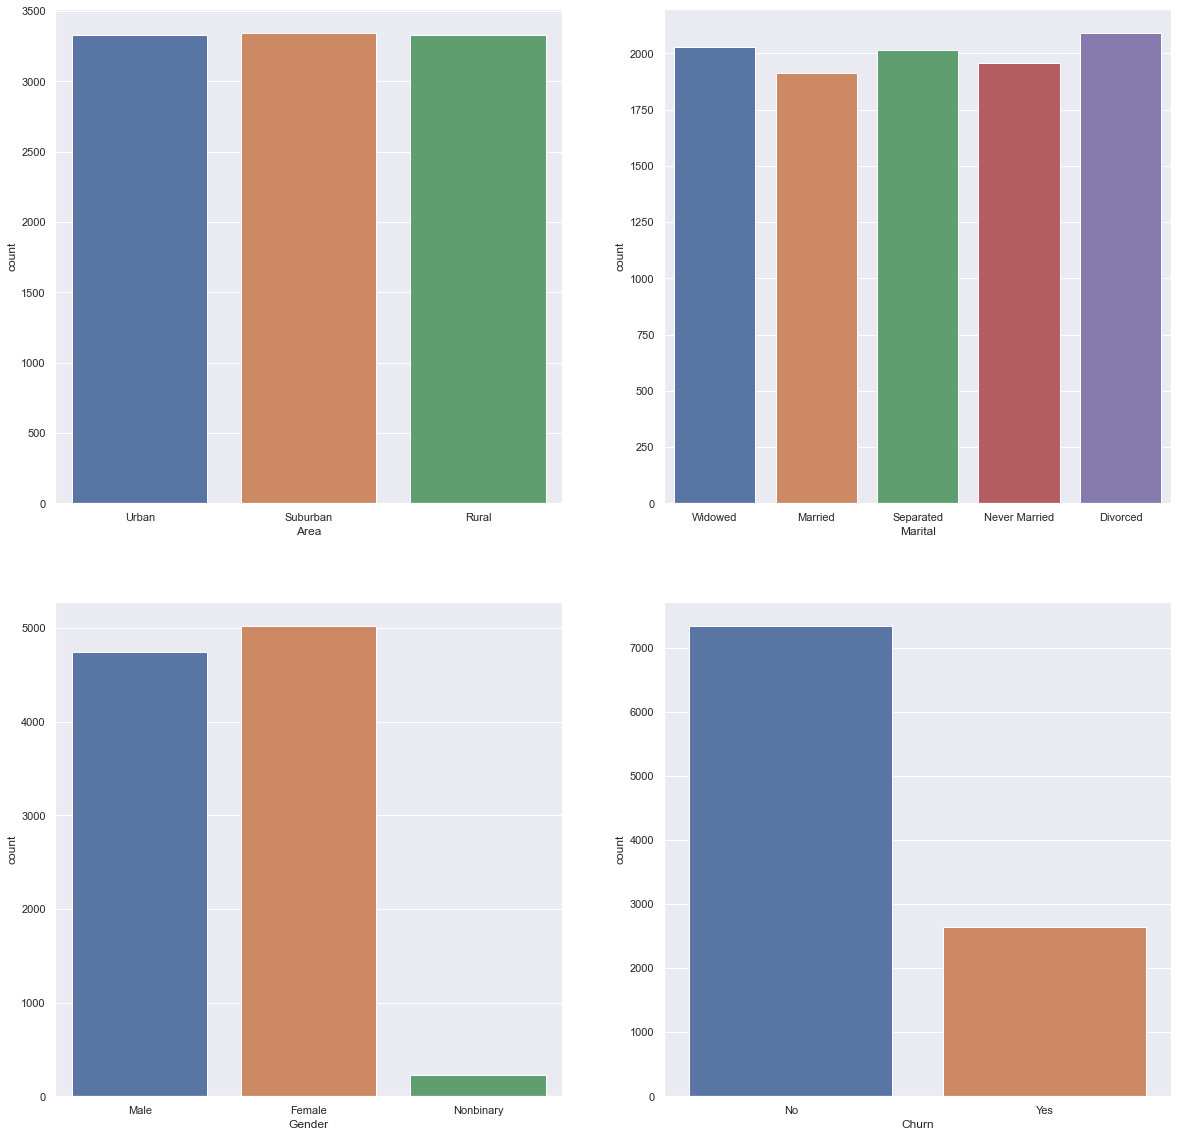

In [121]:
# Display countplots for distribution of categorical variables
fig, ax = plt.subplots(figsize = (20,20), ncols = 2, nrows = 2)
sns.countplot(x='Area', data=df_data, ax = ax[0][0])
sns.countplot(x='Marital', data=df_data, ax = ax[0][1])
sns.countplot(x='Gender', data=df_data, ax = ax[1][0])
sns.countplot(x='Churn', data=df_data, ax = ax[1][1])

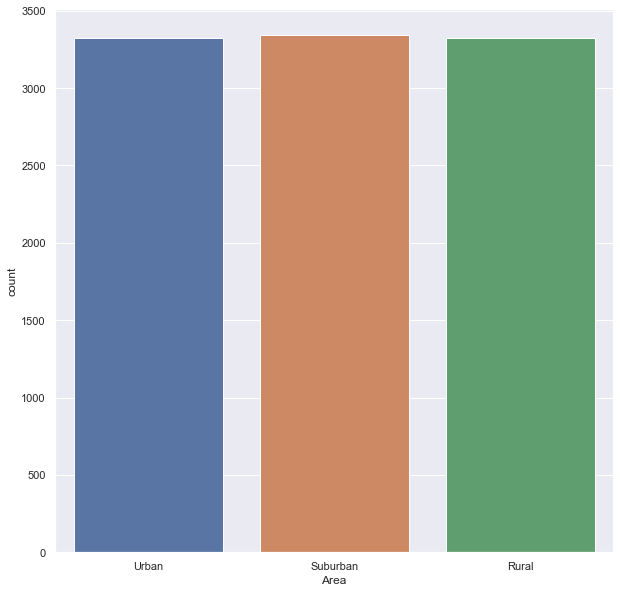

count        10000
unique           3
top       Suburban
freq          3346
Name: Area, dtype: object

In [122]:
# Display countplot and summary statistics for Area
sns.countplot(x='Area', data=df_data)
plt.show()
df_data['Area'].describe()

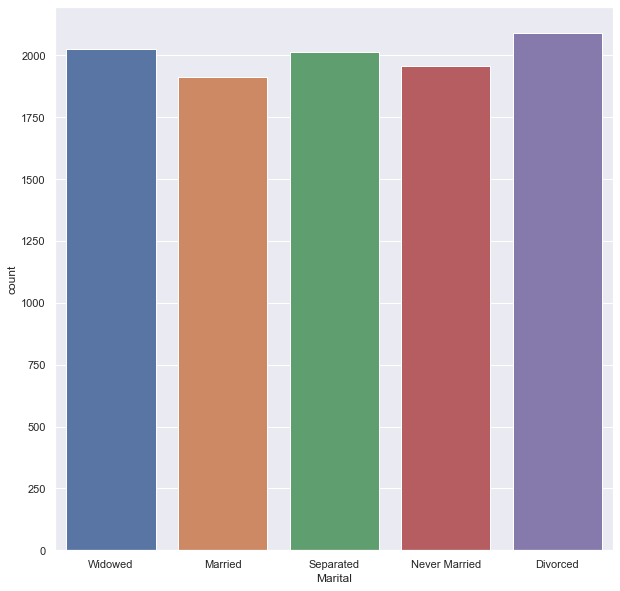

count        10000
unique           5
top       Divorced
freq          2092
Name: Marital, dtype: object

In [123]:
# Display countplot and summary statistics for Marital
sns.countplot(x='Marital', data=df_data)
plt.show()
df_data['Marital'].describe()

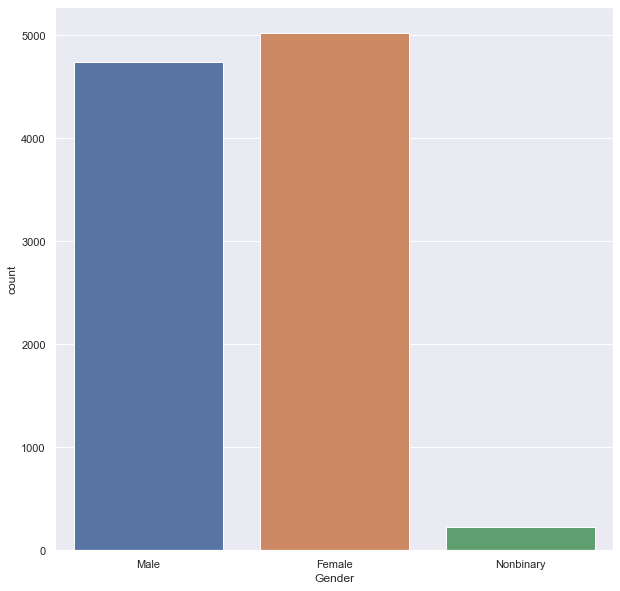

count      10000
unique         3
top       Female
freq        5025
Name: Gender, dtype: object

In [124]:
# Display countplot and summary statistics for Gender
sns.countplot(x='Gender', data=df_data)
plt.show()
df_data['Gender'].describe()

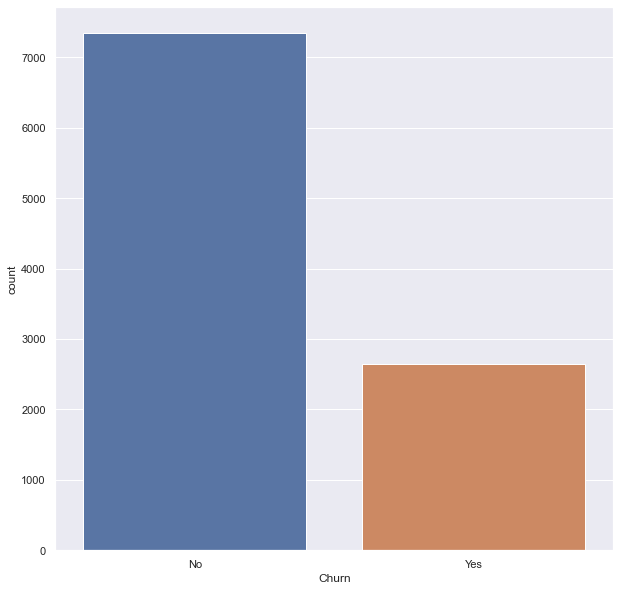

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

In [125]:
# Display countplot and summary statistics for Churn
sns.countplot(x='Churn', data=df_data)
plt.show()
df_data['Churn'].describe()

In [126]:
# Reassign data types
for col in df_data:
    if df_data[col].dtypes == 'object':
        df_data[col] = df_data[col].astype('category')
    if df_data[col].dtypes == 'int64':
        df_data[col] = df_data[col].astype(int)
    if df_data[col].dtypes == 'float64':
        df_data[col] = df_data[col].astype(float)

In [127]:
# Display dataset info and observe data type changes
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Area                  10000 non-null  category
 1   Children              10000 non-null  int32   
 2   Age                   10000 non-null  int32   
 3   Income                10000 non-null  float64 
 4   Marital               10000 non-null  category
 5   Gender                10000 non-null  category
 6   Churn                 10000 non-null  category
 7   Outage_sec_perweek    10000 non-null  float64 
 8   Yearly_equip_failure  10000 non-null  int32   
 9   Tenure                10000 non-null  float64 
 10  MonthlyCharge         10000 non-null  float64 
 11  Bandwidth_GB_Year     10000 non-null  float64 
dtypes: category(4), float64(5), int32(3)
memory usage: 547.6 KB


In [128]:
# Use cat.codes for label encoding of 4 categorical variables
df_data['Area_cat'] = df_data['Area'].cat.codes
df_data['Marital_cat'] = df_data['Marital'].cat.codes
df_data['Gender_cat'] = df_data['Gender'].cat.codes
df_data['Churn_cat'] = df_data['Churn'].cat.codes

In [129]:
# Display dataset top 5 rows from label encoded variables
df_data[['Area', 'Marital', 'Gender', 'Churn', 'Area_cat', 'Marital_cat', 'Gender_cat', 'Churn_cat']].head()

,Area,Marital,Gender,Churn,Area_cat,Marital_cat,Gender_cat,Churn_cat
0,Urban,Widowed,Male,No,2,4,1,0
1,Urban,Married,Female,Yes,2,1,0,1
2,Urban,Widowed,Female,No,2,4,0,0
3,Suburban,Married,Male,No,1,1,1,0
4,Suburban,Separated,Male,Yes,1,3,1,1


<AxesSubplot:xlabel='MonthlyCharge', ylabel='Bandwidth_GB_Year'>

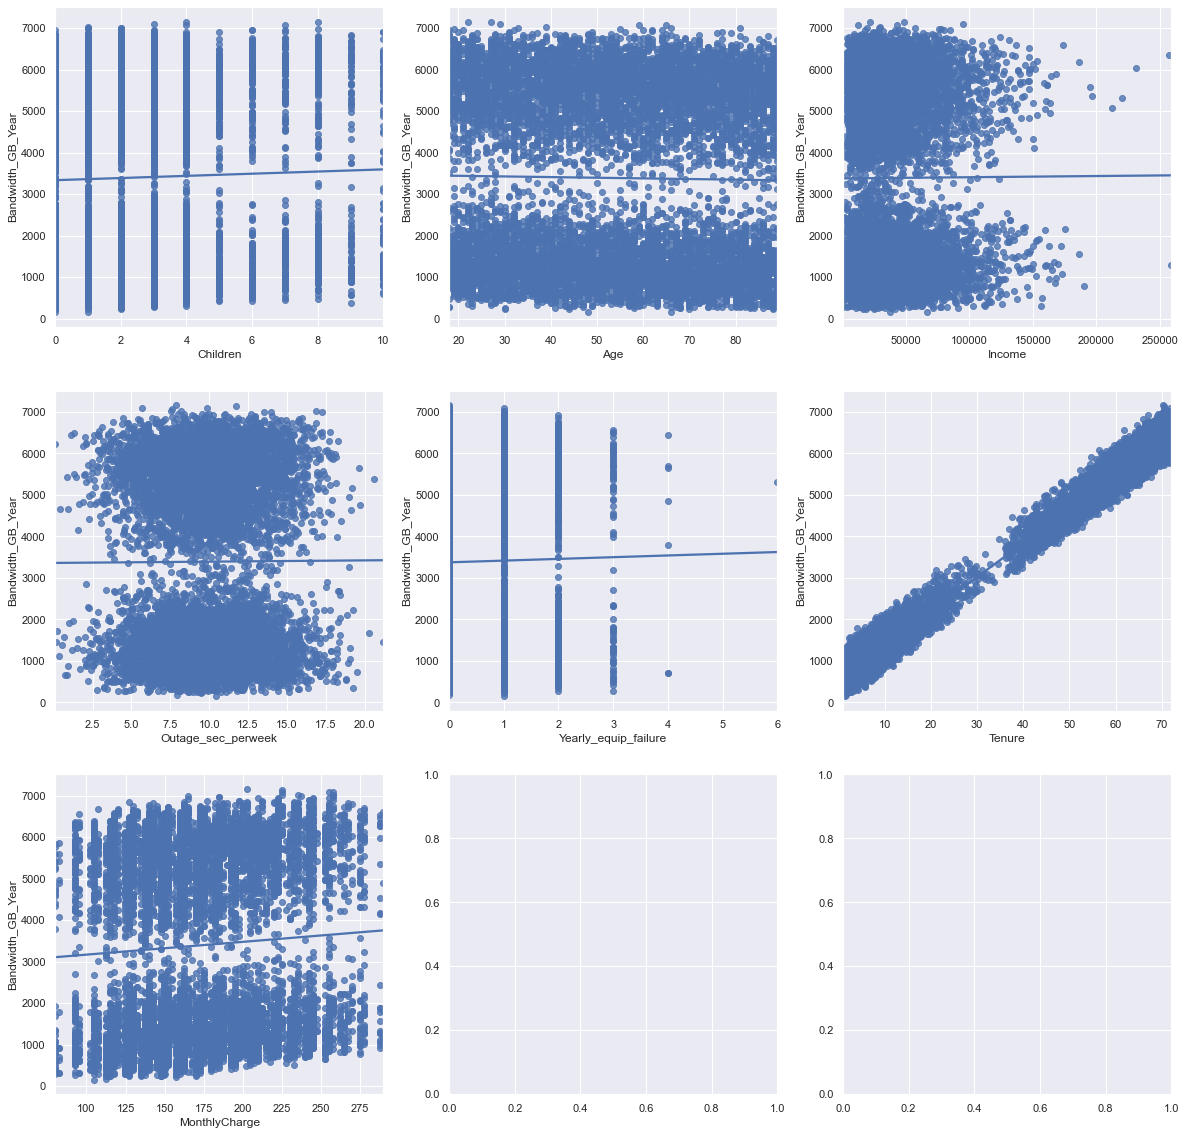

In [130]:
# Display regplots for bivariate statistical analysis of continuous variables - dependent variable = Bandwidth_GB_Year
fig, ax = plt.subplots(figsize = (20,20), ncols = 3, nrows = 3)
sns.regplot(x="Children",
            y="Bandwidth_GB_Year",
            data=df_data,
            ax = ax[0][0],
            ci=None)
sns.regplot(x="Age",
            y="Bandwidth_GB_Year",
            data=df_data,
            ax = ax[0][1],
            ci=None)
sns.regplot(x="Income",
            y="Bandwidth_GB_Year",
            data=df_data,
            ax = ax[0][2],
            ci=None)
sns.regplot(x="Outage_sec_perweek",
            y="Bandwidth_GB_Year",
            data=df_data,
            ax = ax[1][0],
            ci=None)
sns.regplot(x="Yearly_equip_failure",
            y="Bandwidth_GB_Year",
            data=df_data,
            ax = ax[1][1],
            ci=None)
sns.regplot(x="Tenure",
            y="Bandwidth_GB_Year",
            data=df_data,
            ax = ax[1][2],
            ci=None)
sns.regplot(x="MonthlyCharge",
            y="Bandwidth_GB_Year",
            data=df_data,
            ax = ax[2][0],
            ci=None)

<AxesSubplot:xlabel='Churn_cat', ylabel='Bandwidth_GB_Year'>

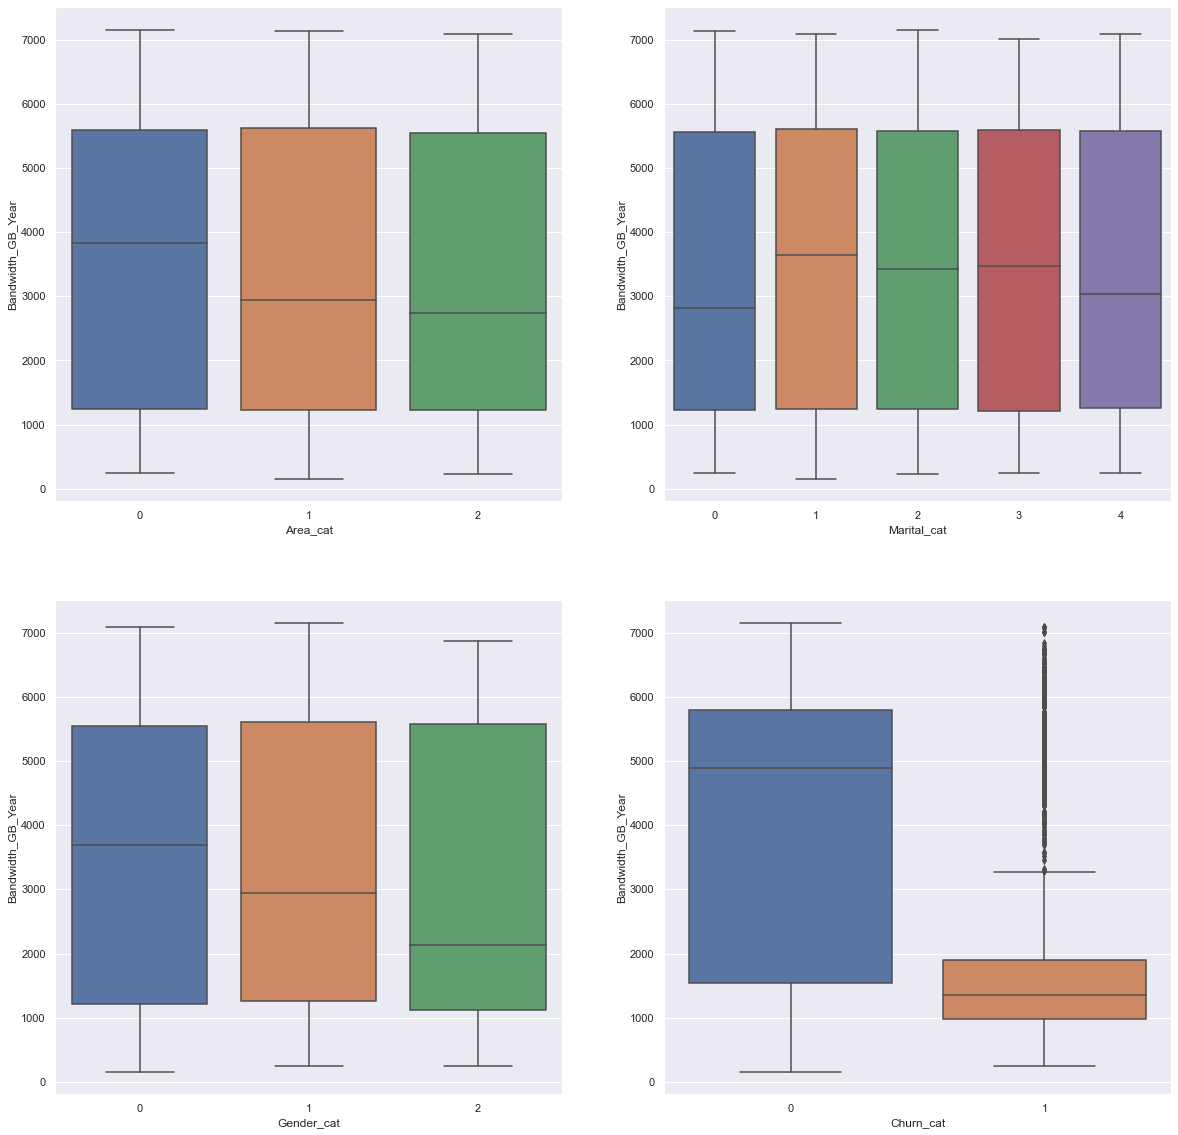

In [131]:
# Display boxplots for bivariate analysis of categorical variables - dependent variable = Bandwidth_GB_Year
fig, ax = plt.subplots(figsize = (20, 20), ncols = 2, nrows = 2)
sns.boxplot(x = 'Area_cat', y = 'Bandwidth_GB_Year', data = df_data, ax = ax[0][0])
sns.boxplot(x = 'Marital_cat', y = 'Bandwidth_GB_Year', data = df_data, ax = ax[0][1])
sns.boxplot(x = 'Gender_cat', y = 'Bandwidth_GB_Year', data = df_data, ax = ax[1][0])
sns.boxplot(x = 'Churn_cat', y = 'Bandwidth_GB_Year', data = df_data, ax = ax[1][1])

In [132]:
# Export prepared dataframe to csv
df_data.to_csv(r'C:\Users\wstul\d208\churn_clean_perpared.csv')

In [133]:
# Create initial model and display summary
mdl_bandwidth_vs_all = ols("Bandwidth_GB_Year ~ Area_cat + Children + Age + Income + Marital_cat + Gender_cat + Churn_cat + \
                        Outage_sec_perweek + Yearly_equip_failure + MonthlyCharge + Tenure", data=df_data).fit()
print(mdl_bandwidth_vs_all.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 8.719e+04
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        02:04:59   Log-Likelihood:                -68209.
No. Observations:               10000   AIC:                         1.364e+05
Df Residuals:                    9988   BIC:                         1.365e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               99.7584 

In [134]:
# Display MSE, RSE, Rsquared and Adjusted Rsquared for initial model
mse_all = mdl_bandwidth_vs_all.mse_resid
print('MSE of original model: ', mse_all)
rse_all = np.sqrt(mse_all)
print('RSE of original model: ', rse_all)
print('Rsquared of original model: ', mdl_bandwidth_vs_all.rsquared)
print('Rsquared Adjusted of original model: ', mdl_bandwidth_vs_all.rsquared_adj)

MSE of original model:  49276.41635896182
RSE of original model:  221.9829190702785
Rsquared of original model:  0.989692793051259
Rsquared Adjusted of original model:  0.989681441501756


In [135]:
# Perform variance inflation factor analysis for initial feature set
X = df_data[['Area_cat', 'Children', 'Age', 'Income', 'Marital_cat', 'Gender_cat', 'Churn_cat', 'Outage_sec_perweek', 
           'Yearly_equip_failure', 'Tenure', 'MonthlyCharge']]
vif_data = pd.DataFrame()
vif_data['IndVar'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                  IndVar        VIF
0               Area_cat   2.425228
1               Children   1.897584
2                    Age   6.461163
3                 Income   2.847813
4            Marital_cat   2.810940
5             Gender_cat   1.879759
6              Churn_cat   2.166807
7     Outage_sec_perweek   9.250534
8   Yearly_equip_failure   1.382208
9                 Tenure   3.653279
10         MonthlyCharge  14.379482


In [136]:
# Drop 2 high VIF variables
X = X.drop(['Outage_sec_perweek', 'MonthlyCharge'], axis = 1)

In [137]:
# Perform variance inflation factor analysis for trimmed feature set
vif_data = pd.DataFrame()
vif_data['IndVar'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                 IndVar       VIF
0              Area_cat  2.315820
1              Children  1.834000
2                   Age  4.959615
3                Income  2.675762
4           Marital_cat  2.652144
5            Gender_cat  1.820088
6             Churn_cat  1.616385
7  Yearly_equip_failure  1.367955
8                Tenure  2.954382


In [138]:
# Create temporary dataframe of trimmed feature set + dependent variable and display correlation table
df_data_reduced = pd.DataFrame(df_data[['Area_cat', 'Children', 'Age', 'Income', 'Marital_cat', 'Gender_cat', 'Churn_cat', 'Yearly_equip_failure', 'Tenure', 'Bandwidth_GB_Year']])
df_data_reduced.corr()

,Area_cat,Children,Age,Income,Marital_cat,Gender_cat,Churn_cat,Yearly_equip_failure,Tenure,Bandwidth_GB_Year
Area_cat,1.000000,-0.007879,0.011745,0.002557,0.013733,0.004057,0.014166,-0.006554,-0.016615,-0.016575
Children,-0.007879,1.000000,-0.029732,0.009942,0.000045,0.006032,-0.004264,0.007321,-0.005091,0.025585
Age,0.011745,-0.029732,1.000000,-0.004091,-0.009721,-0.005660,0.005630,0.008577,0.016979,-0.014724
Income,0.002557,0.009942,-0.004091,1.000000,-0.005045,-0.018436,0.005937,0.005423,0.002114,0.003674
Marital_cat,0.013733,0.000045,-0.009721,-0.005045,1.000000,-0.008360,0.012716,0.001183,0.003241,0.001499
Gender_cat,0.004057,0.006032,-0.005660,-0.018436,-0.008360,1.000000,0.023919,0.014750,-0.016051,-0.001469
Churn_cat,0.014166,-0.004264,0.005630,0.005937,0.012716,0.023919,1.000000,-0.015927,-0.485475,-0.441669
Yearly_equip_failure,-0.006554,0.007321,0.008577,0.005423,0.001183,0.014750,-0.015927,1.000000,0.012435,0.012034
Tenure,-0.016615,-0.005091,0.016979,0.002114,0.003241,-0.016051,-0.485475,0.012435,1.000000,0.991495
Bandwidth_GB_Year,-0.016575,0.025585,-0.014724,0.003674,0.001499,-0.001469,-0.441669,0.012034,0.991495,1.000000


In [139]:
# Create first reduced model and display summary
mdl_bandwidth_vs_reduced = ols("Bandwidth_GB_Year ~ Area_cat + Children + Age + Income + Marital_cat + Gender_cat + Churn_cat + \
                        Yearly_equip_failure + Tenure", data=df_data).fit()
print(mdl_bandwidth_vs_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 8.596e+04
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        02:05:40   Log-Likelihood:                -69272.
No. Observations:               10000   AIC:                         1.386e+05
Df Residuals:                    9990   BIC:                         1.386e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              507.8800 

In [140]:
# Display MSE, RSE for first reduced model
mse_reduced = mdl_bandwidth_vs_reduced.mse_resid
print('MSE of reduced model: ', mse_reduced)
rse_reduced = np.sqrt(mse_reduced)
print('RSE of reduced model: ', rse_reduced)

MSE of reduced model:  60936.347257474525
RSE of reduced model:  246.8528858601303


In [141]:
# Create second reduced model and display summary
mdl_bandwidth_vs_features = ols("Bandwidth_GB_Year ~ Children + Age + Marital_cat + Gender_cat + Churn_cat + Tenure", data=df_data).fit()
print(mdl_bandwidth_vs_features.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.290e+05
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        02:06:00   Log-Likelihood:                -69273.
No. Observations:               10000   AIC:                         1.386e+05
Df Residuals:                    9993   BIC:                         1.386e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     511.5803      9.586     53.369      

In [142]:
# Display MSE, RSE, Rsquared and Adjusted Rsquared for second reduced model
mse_features = mdl_bandwidth_vs_features.mse_resid
print('MSE of reduced model: ', mse_features)
rse_features = np.sqrt(mse_features)
print('RSE of reduced model: ', rse_features)
print('Rsquared of reduced model: ', mdl_bandwidth_vs_features.rsquared)
print('Rsquared Adjusted of reduced model: ', mdl_bandwidth_vs_features.rsquared_adj)

MSE of reduced model:  60923.13862410184
RSE of reduced model:  246.82613035110737
Rsquared of reduced model:  0.9872502548864599
Rsquared Adjusted of reduced model:  0.9872425996807478


In [143]:
# Create final reduced model and display summary
mdl_bandwidth_vs_features_final = ols("Bandwidth_GB_Year ~ Children + Age + Marital_cat + Gender_cat + Churn_cat + Tenure", data=df_data).fit()
print(mdl_bandwidth_vs_features_final.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.290e+05
Date:                Sun, 15 May 2022   Prob (F-statistic):               0.00
Time:                        02:06:18   Log-Likelihood:                -69273.
No. Observations:               10000   AIC:                         1.386e+05
Df Residuals:                    9993   BIC:                         1.386e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     511.5803      9.586     53.369      

In [144]:
# Display MSE, RSE, Rsquared and Adjusted Rsquared for initial model and final reduced model for comparison
print('MSE of original model: ', mse_all)
print('RSE of original model: ', rse_all)
print('Rsquared of original model: ', mdl_bandwidth_vs_all.rsquared)
print('Rsquared Adjusted of original model: ', mdl_bandwidth_vs_all.rsquared_adj)
mse_final = mdl_bandwidth_vs_features_final.mse_resid
print('MSE of final model: ', mse_final)
rse_final = np.sqrt(mse_final)
print('RSE of final model: ', rse_final)
print('Rsquared of final model: ', mdl_bandwidth_vs_features_final.rsquared)
print('Rsquared Adjusted of final model: ', mdl_bandwidth_vs_features_final.rsquared_adj)

MSE of original model:  49276.41635896182
RSE of original model:  221.9829190702785
Rsquared of original model:  0.989692793051259
Rsquared Adjusted of original model:  0.989681441501756
MSE of final model:  60923.13862410184
RSE of final model:  246.82613035110737
Rsquared of final model:  0.9872502548864599
Rsquared Adjusted of final model:  0.9872425996807478


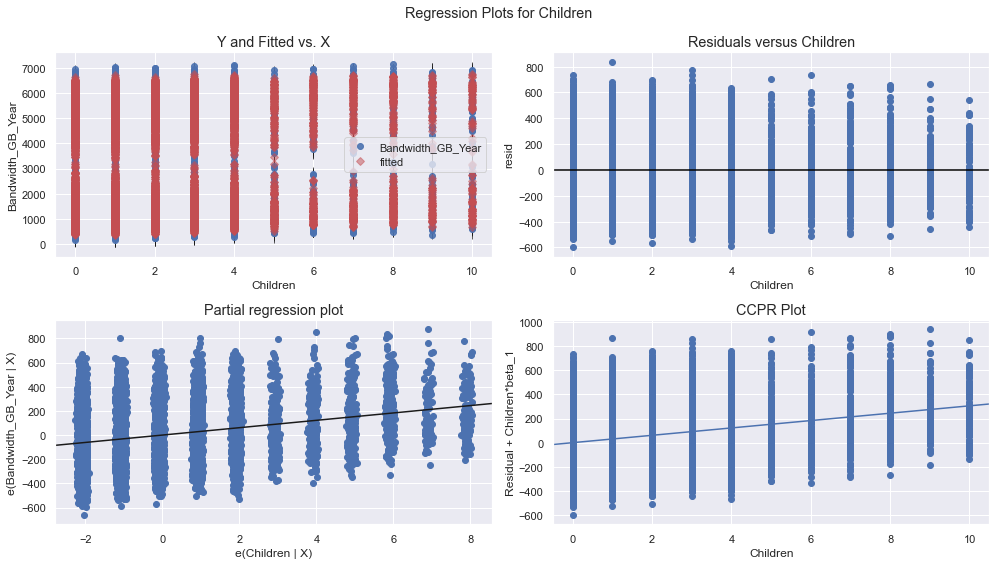

In [145]:
# Plots for independent variable Children
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(mdl_bandwidth_vs_features_final, 'Children', fig=fig)

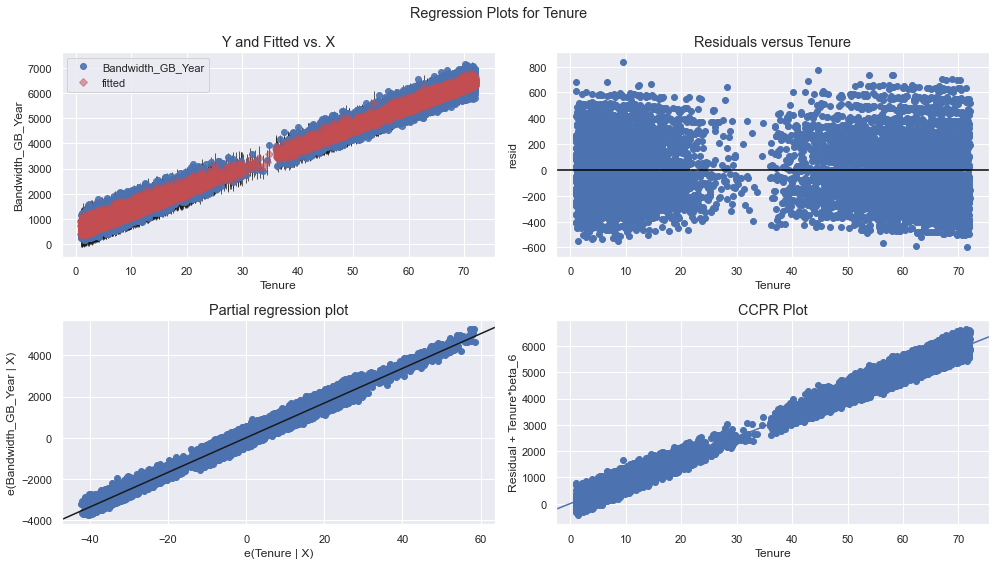

In [146]:
# Plots for independent variable Tenure
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(mdl_bandwidth_vs_features_final, 'Tenure', fig=fig)

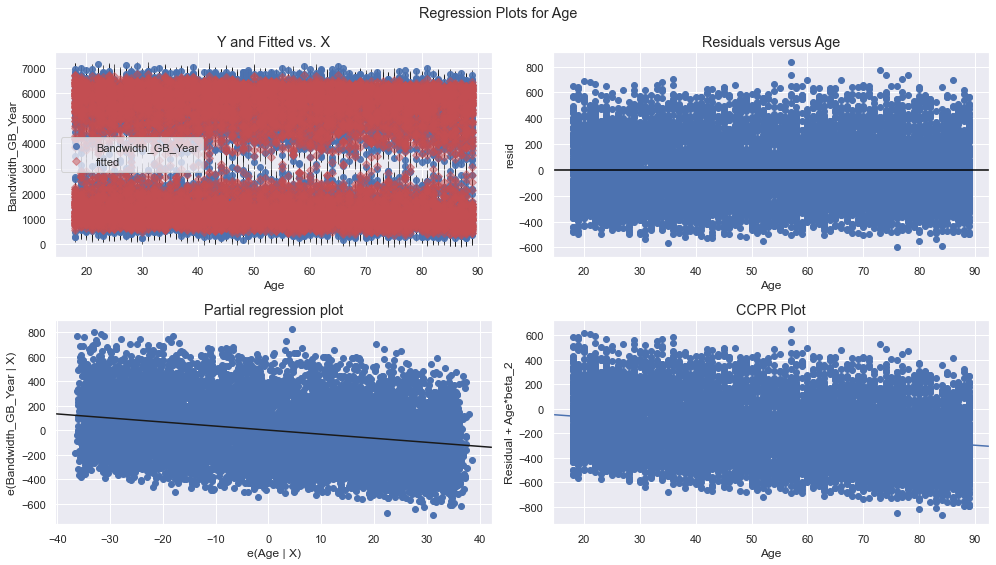

In [147]:
# Plots for independent variable Age
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(mdl_bandwidth_vs_features_final, 'Age', fig=fig)

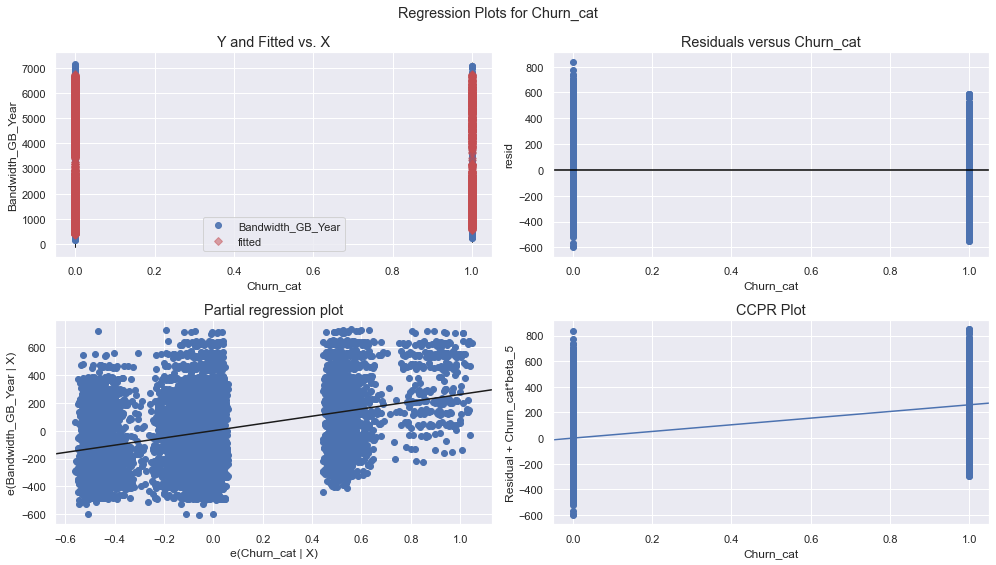

In [148]:
# Plots for independent variable Churn_cat
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(mdl_bandwidth_vs_features_final, 'Churn_cat', fig=fig)

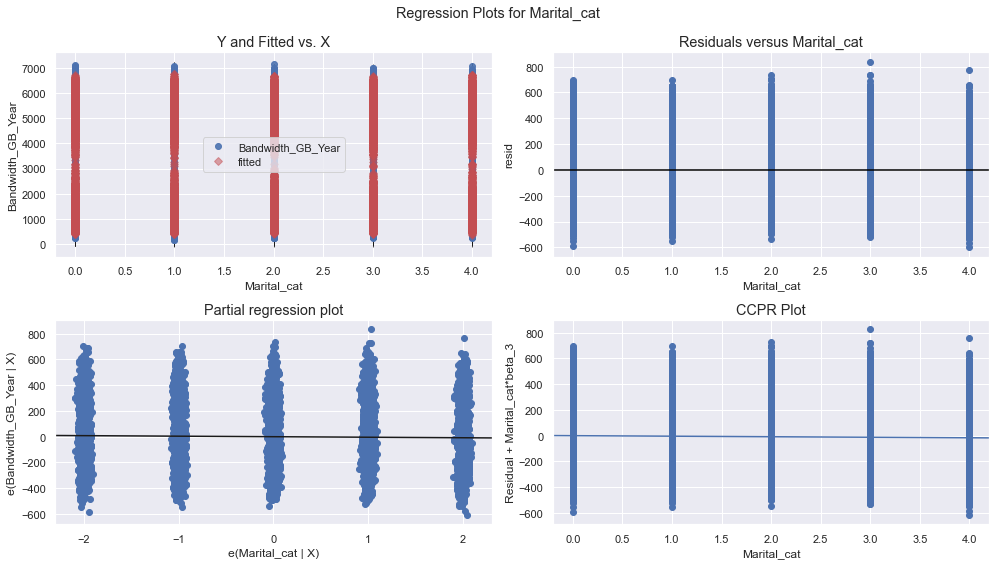

In [149]:
# Plots for independent variable Marital_cat
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(mdl_bandwidth_vs_features_final, 'Marital_cat', fig=fig)

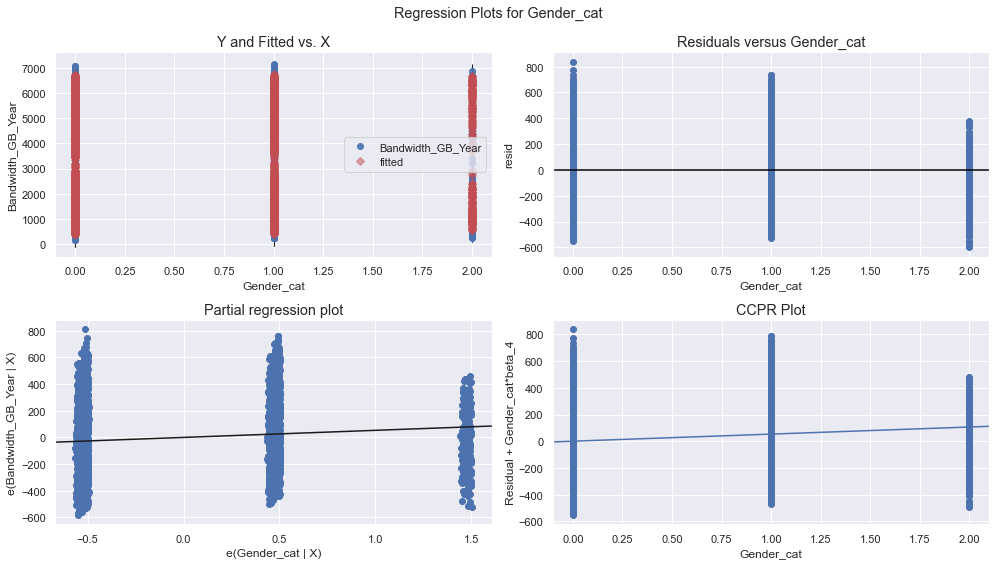

In [150]:
# Plots for independent variable Gender_cat
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(mdl_bandwidth_vs_features_final, 'Gender_cat', fig=fig)

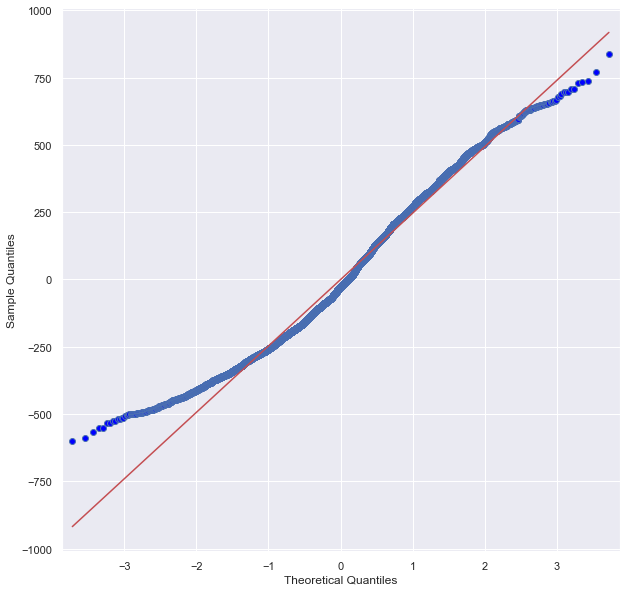

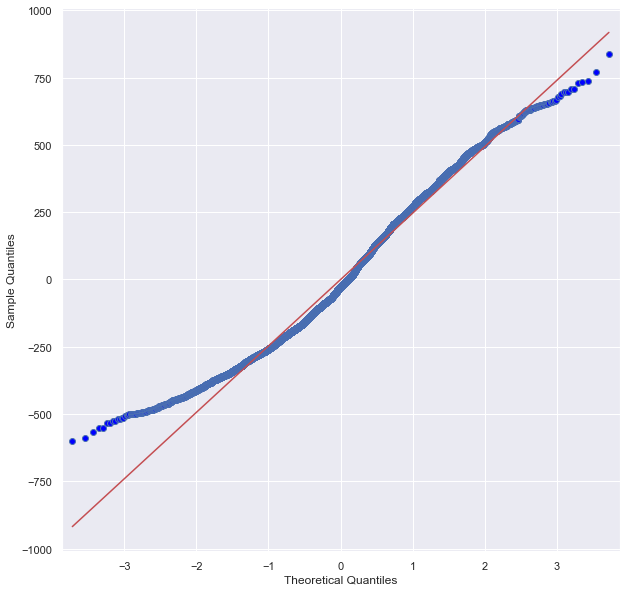

In [151]:
# Q-Q plot for final model
sm.qqplot(mdl_bandwidth_vs_features_final.resid, line='s')